In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Dataset

In [2]:
!curl -O https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 13  853k   13  112k    0     0   191k      0  0:00:04 --:--:--  0:00:04  191k
100  853k  100  853k    0     0   932k      0 --:--:-- --:--:-- --:--:--  933k


In [3]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [6]:
# Making a copy of the original dataset
orig_df = df.copy()

## Preparing the dataset
Use only the following columns:
```
'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'
```

In [7]:
cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[cols]

In [8]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## EDA
Look at the `fuel_efficiency_mpg` variable. Does it have a long tail?

In [9]:
df.fuel_efficiency_mpg

0       13.231729
1       13.688217
2       14.246341
3       16.912736
4       12.488369
          ...    
9699    15.101802
9700    17.962326
9701    17.186587
9702    15.331551
9703    14.884467
Name: fuel_efficiency_mpg, Length: 9704, dtype: float64

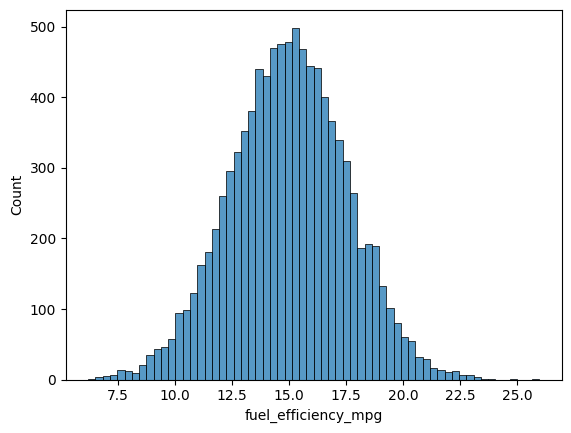

In [10]:
sns.histplot(df.fuel_efficiency_mpg);

The `fuel_efficiency_mpg` variable does not have a long tail. It's very close to a normal distribution

### Question 1
There's one column with missing values. What is it?
```
'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'
```

In [11]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

The `horsepower` column has 708 missing values

In [12]:
# Checking if there's any duplicate values
df.duplicated().value_counts()

False    9704
Name: count, dtype: int64

### Question 2
What's the median (50% percentile) for variable 'horsepower'?
```
49
99
149
199
```

In [13]:
df.horsepower.median()

np.float64(149.0)

In [14]:
# Also we can check it by descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_displacement,9704.0,199.708368,49.455319,10.000000,170.000000,200.000000,230.000000,380.000000
horsepower,8996.0,149.657292,29.879555,37.000000,130.000000,149.000000,170.000000,271.000000
vehicle_weight,9704.0,3001.280993,497.894860,952.681761,2666.248985,2993.226296,3334.957039,4739.077089
model_year,9704.0,2011.484027,6.659808,2000.000000,2006.000000,2012.000000,2017.000000,2023.000000
fuel_efficiency_mpg,9704.0,14.985243,2.556468,6.200971,13.267459,15.006037,16.707965,25.967222


## Prepare and split the dataset
```
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
```
Use the same code as in the lectures

In [15]:
# Creating a random seed of 42
np.random.seed(42)

# Creating an array of index equal to the length of the dataset
df_length = len(df)
idx = np.arange(df_length)
print(f"First 5 elements before shuffling: {idx[:5]}")

# Shuffling the indexes
np.random.shuffle(idx)
print(f"First 5 elements after shuffling: {idx[:5]}")

First 5 elements before shuffling: [0 1 2 3 4]
First 5 elements after shuffling: [ 483 7506 8795 1688 6217]


In [16]:
# Splitting the dataset into train/val/test -> 60/20/20
n_val = int(df_length * 0.2)
n_test = int(df_length * 0.2)
n_train = df_length - n_val - n_test
n_train, n_val, n_test

(5824, 1940, 1940)

In [17]:
df_length == n_train + n_val + n_test

True

In [18]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val: ]]

In [19]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [20]:
df_val.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
6163,180,112.0,2772.134410,2020,15.366341
3313,260,138.0,3014.061530,2022,14.601182
4781,140,181.0,3652.186151,2016,12.247032
8210,270,105.0,2753.040847,2023,15.136400
6713,170,224.0,4163.375137,2003,10.340419


In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
df_val.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,180,112.0,2772.134410,2020,15.366341
1,260,138.0,3014.061530,2022,14.601182
2,140,181.0,3652.186151,2016,12.247032
3,270,105.0,2753.040847,2023,15.136400
4,170,224.0,4163.375137,2003,10.340419


In [23]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [24]:
df_train.fuel_efficiency_mpg

0       16.642943
1       16.298377
2       18.591822
3       11.818843
4       19.402209
          ...    
5819    16.964054
5820    10.059094
5821    17.593237
5822    18.925748
5823    17.965284
Name: fuel_efficiency_mpg, Length: 5824, dtype: float64

In [25]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Question 3
```
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?
```

#### Filling missing values with zeros

In [26]:
df_train_orig = df_train.copy()
df_val_orig = df_val.copy()

In [27]:
df_train.horsepower.isnull().sum()

np.int64(429)

We know, the normal equation is:
```
w = (X.T * X)^-1 * X.T * y
```

In [28]:
cols

['engine_displacement',
 'horsepower',
 'vehicle_weight',
 'model_year',
 'fuel_efficiency_mpg']

In [29]:
feature_cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
def prepare_X(df, fill_value=0):
    df = df[feature_cols]
    df = df.fillna(fill_value)
    X = df.values
    return X

In [30]:
def linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y_train)
    return w[0], w[1:]

In [31]:
def rmse(y_pred, y_true):
    mse = ((y_pred-y_true)**2).mean()
    return np.sqrt(mse)

In [32]:
X_train_zero = prepare_X(df_train)
X_val_zero = prepare_X(df_val)

In [33]:
w0_zero, w_zero = linear_regression(X_train_zero, y_train)

In [34]:
w0_zero.shape, w_zero.shape, X_val_zero.shape

((), (4,), (1940, 4))

In [35]:
y_pred_zero = w0_zero + w_zero.dot(X_val_zero.T)

In [36]:
np.round(rmse(y_pred_zero, y_val), 2)

np.float64(0.52)

#### Filling missing values with mean

In [37]:
df_train = df_train_orig.copy()
df_val = df_val_orig.copy()

In [38]:
df_train.horsepower.isnull().sum()

np.int64(429)

In [39]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006


In [40]:
mean = df_train['horsepower'].mean()

In [41]:
X_train_mean = prepare_X(df_train, mean)
X_val_mean = prepare_X(df_val, mean)

In [42]:
w0_mean, w_mean = linear_regression(X_train_mean, y_train)

In [43]:
y_pred_mean = w0_mean + w_mean.dot(X_val_mean.T)

In [44]:
np.round(rmse(y_pred_mean, y_val), 2)

np.float64(0.46)

In this case we can see, filling missing values with `mean` value of `horsepower` column gives us a better RMSE loss

### Question 4
Now let's train a regularized linear regression.
```
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If multiple options give the same best RMSE, select the smallest r.

Options:

0
0.01
1
10
100
```

In [45]:
# fill the NAs with 0.
df_train = df_train_orig.copy()
df_val = df_val_orig.copy()

In [46]:
df_train.horsepower.isnull().sum()

np.int64(429)

In [47]:
def linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [48]:
rmse_losses = []
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train_zero = prepare_X(df_train, 0)
    X_val_zero = prepare_X(df_val, 0)
    w0, w = linear_regression_reg(X_train_zero, y_train, r)
    y_pred = w0 + X_val_zero.dot(w)
    loss = np.round(rmse(y_pred, y_val), 2)
    rmse_losses.append(loss)
    print(f"For the value of r={r}, the RMSE loss is={loss}")

For the value of r=0, the RMSE loss is=0.52
For the value of r=0.01, the RMSE loss is=0.52
For the value of r=0.1, the RMSE loss is=0.52
For the value of r=1, the RMSE loss is=0.52
For the value of r=5, the RMSE loss is=0.52
For the value of r=10, the RMSE loss is=0.52
For the value of r=100, the RMSE loss is=0.52


They all give the same RMSE loss. The smallest one is `r=0.01`

In [49]:
# rmse_losses = []
# for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
#     X_train_zero = prepare_X(df_train, mean)
#     X_val_zero = prepare_X(df_val, mean)
#     w0, w = linear_regression_reg(X_train_zero, y_train, r)
#     y_pred = w0 + X_val_zero.dot(w)
#     loss = np.round(rmse(y_pred, y_val), 2)
#     rmse_losses.append(loss)
#     print(f"For the value of r={r}, the RMSE loss is={loss}")

### Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
```
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

0.001
0.006
0.060
0.600
```

In [50]:
cols

['engine_displacement',
 'horsepower',
 'vehicle_weight',
 'model_year',
 'fuel_efficiency_mpg']

In [51]:
def split_df(seed):
    # Copying df
    df = orig_df.copy()

    # Creating a new df with required cols
    df = df[cols]
    n = len(df)
    # random idx generation
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    # Creating a new shuffled df
    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    return df_train, y_train, df_val, y_val, df_test, y_test

In [52]:
rmse_losses = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, y_train, df_val, y_val, df_test, y_test = split_df(seed)
    
    X_train_zero = prepare_X(df_train, 0)
    X_val_zero = prepare_X(df_val, 0)
    
    w0, w = linear_regression(X_train_zero, y_train)
    y_pred = w0 + X_val_zero.dot(w)
    
    loss = np.round(rmse(y_pred, y_val), 2)
    rmse_losses.append(loss)
    print(f"For the value of seed={seed}, the RMSE loss is={loss}")

For the value of seed=0, the RMSE loss is=0.52
For the value of seed=1, the RMSE loss is=0.52
For the value of seed=2, the RMSE loss is=0.52
For the value of seed=3, the RMSE loss is=0.52
For the value of seed=4, the RMSE loss is=0.51
For the value of seed=5, the RMSE loss is=0.53
For the value of seed=6, the RMSE loss is=0.53
For the value of seed=7, the RMSE loss is=0.51
For the value of seed=8, the RMSE loss is=0.51
For the value of seed=9, the RMSE loss is=0.51


In [53]:
rmse_losses

[np.float64(0.52),
 np.float64(0.52),
 np.float64(0.52),
 np.float64(0.52),
 np.float64(0.51),
 np.float64(0.53),
 np.float64(0.53),
 np.float64(0.51),
 np.float64(0.51),
 np.float64(0.51)]

In [54]:
std_scores = np.round(np.std(rmse_losses), 3)
std_scores

np.float64(0.007)

### Question 6
```
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

Options:

0.15
0.515
5.15
51.5
```

In [55]:
seed = 9
r = 0.001

df_train, y_train, df_val, y_val, df_test, y_test = split_df(seed)

df_train_full = pd.concat([df_train, df_val])

X_train_full = prepare_X(df_train_full, 0)
y_train_full = np.concatenate([y_train, y_val])

X_test = prepare_X(df_test)

w0, w = linear_regression_reg(X_train_full, y_train_full, r)
y_pred = w0 + X_test.dot(w)

loss = np.round(rmse(y_pred, y_test), 4)
loss

np.float64(0.5156)